
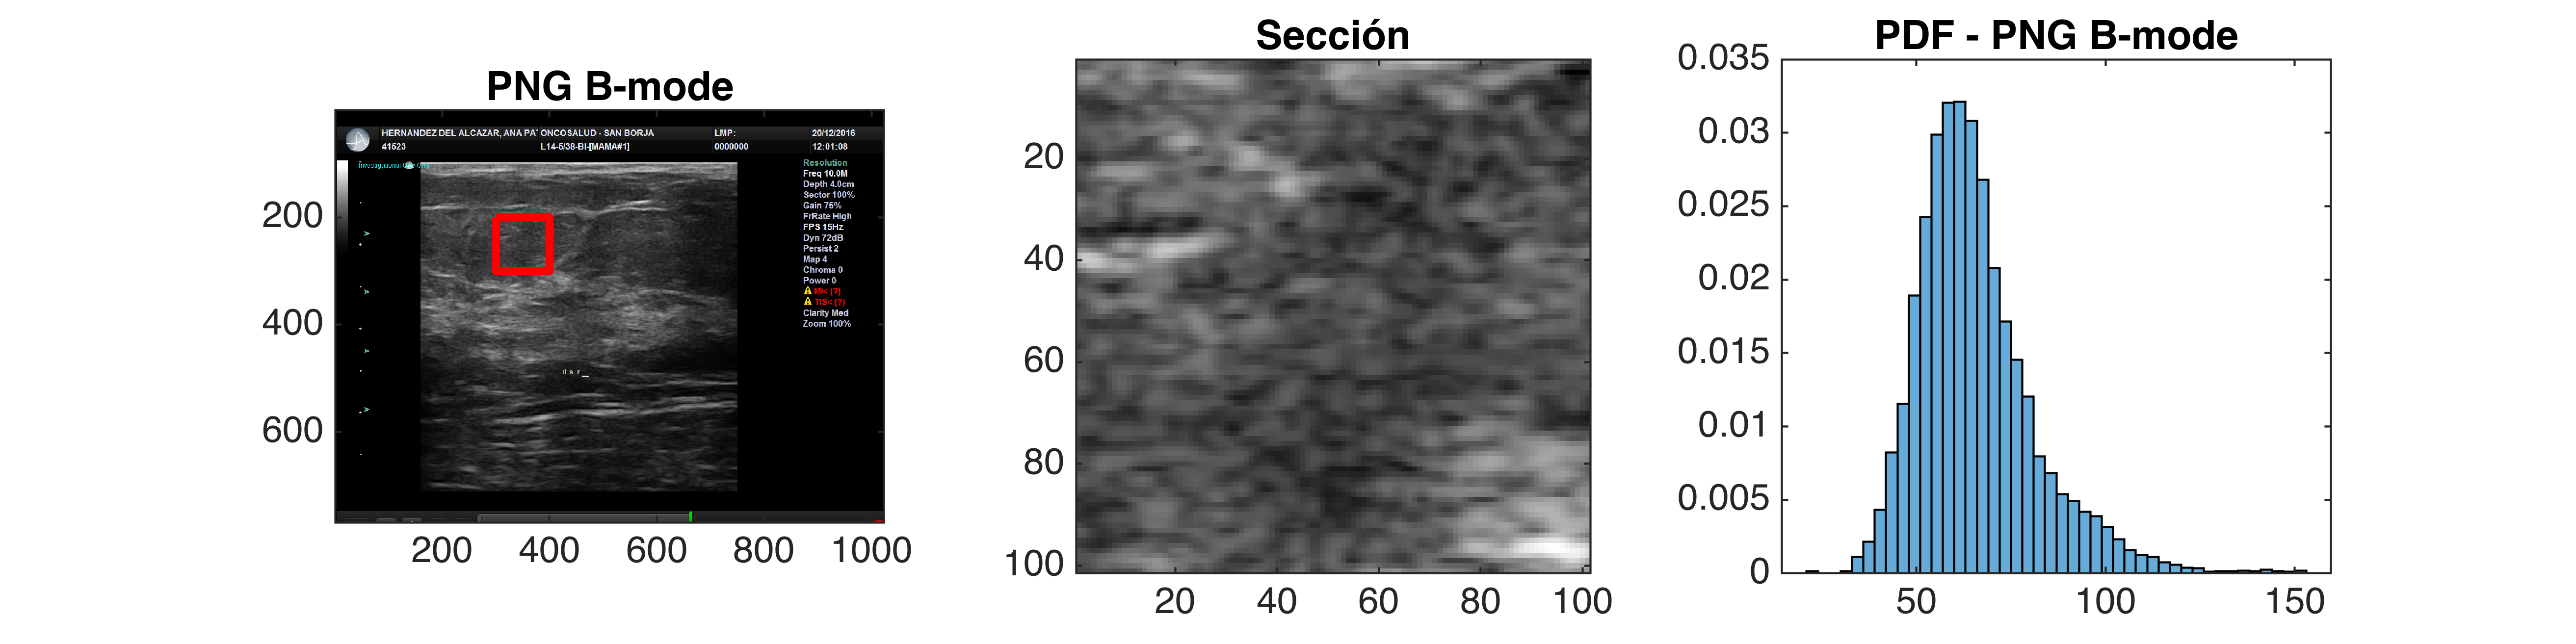

In [1]:
clear; close all; clc;
%
% z=imread('..\data_adq\ATS_20240822_145957.png');
z_png=imread('..\data_adq\breast\41523\12-01-22.png');

figfolder='img/';

           % X  Y
esquinas = [160,97;
            750,710];

xl=[300,400];
yl=[200,300];

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);
imagesc(z_png);axis image;hold on;
plot([xl(1), xl(2), xl(2), xl(1), xl(1)], ...
     [yl(1), yl(1), yl(2), yl(2), yl(1)], ...
     LineWidth=2,Color='r');
hold off;
z_png=z_png(yl(1):yl(2),xl(1):xl(2)); z_png=double(z_png);
title('\bfPNG B-mode');

subplot(1,3,2);imagesc(z_png);axis image;colormap gray;title('Sección')
subplot(1,3,3);histogram(z_png,Normalization='pdf');title('PDF - PNG B-mode');


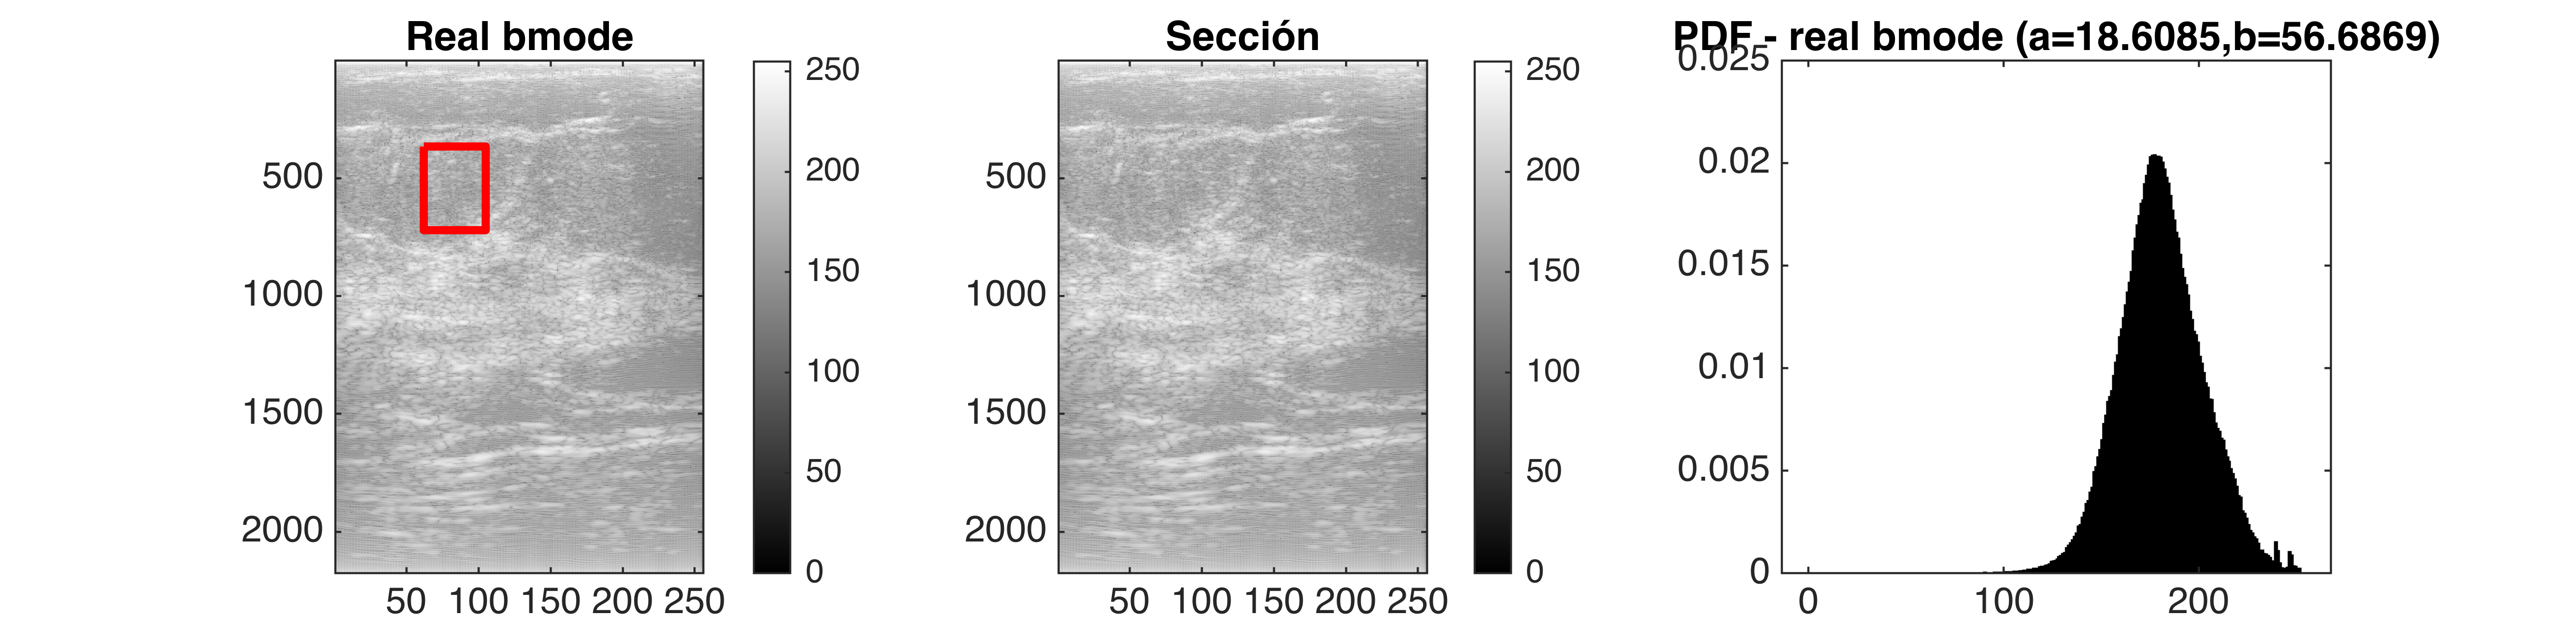

In [2]:


[rf,feat] = RPread('..\data_adq\breast\41523\12-01-22.rf');
env_rf=abs(hilbert(rf));
[a_0,b_0]=getab(env_rf);
z=a_0*log(env_rf)+b_0;

rf_xl=round(remaplims(xl,esquinas(1,1),esquinas(2,1),1,size(rf,2)));
rf_yl=round(remaplims(yl,esquinas(1,2),esquinas(2,2),1,size(rf,1)));

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);
imagesc(z);hold on;colormap gray;colorbar;
plot([rf_xl(1), rf_xl(2), rf_xl(2), rf_xl(1), rf_xl(1)], ...
     [rf_yl(1), rf_yl(1), rf_yl(2), rf_yl(2), rf_yl(1)], ...
     LineWidth=2,Color='r');
hold off;title('\bfReal bmode');

subplot(1,3,2);imagesc(z);colormap gray;colorbar;title('Sección');
subplot(1,3,3);histogram(z,Normalization='pdf');title(['PDF - real bmode (a=',num2str(a_0),',b=',num2str(b_0),')']);


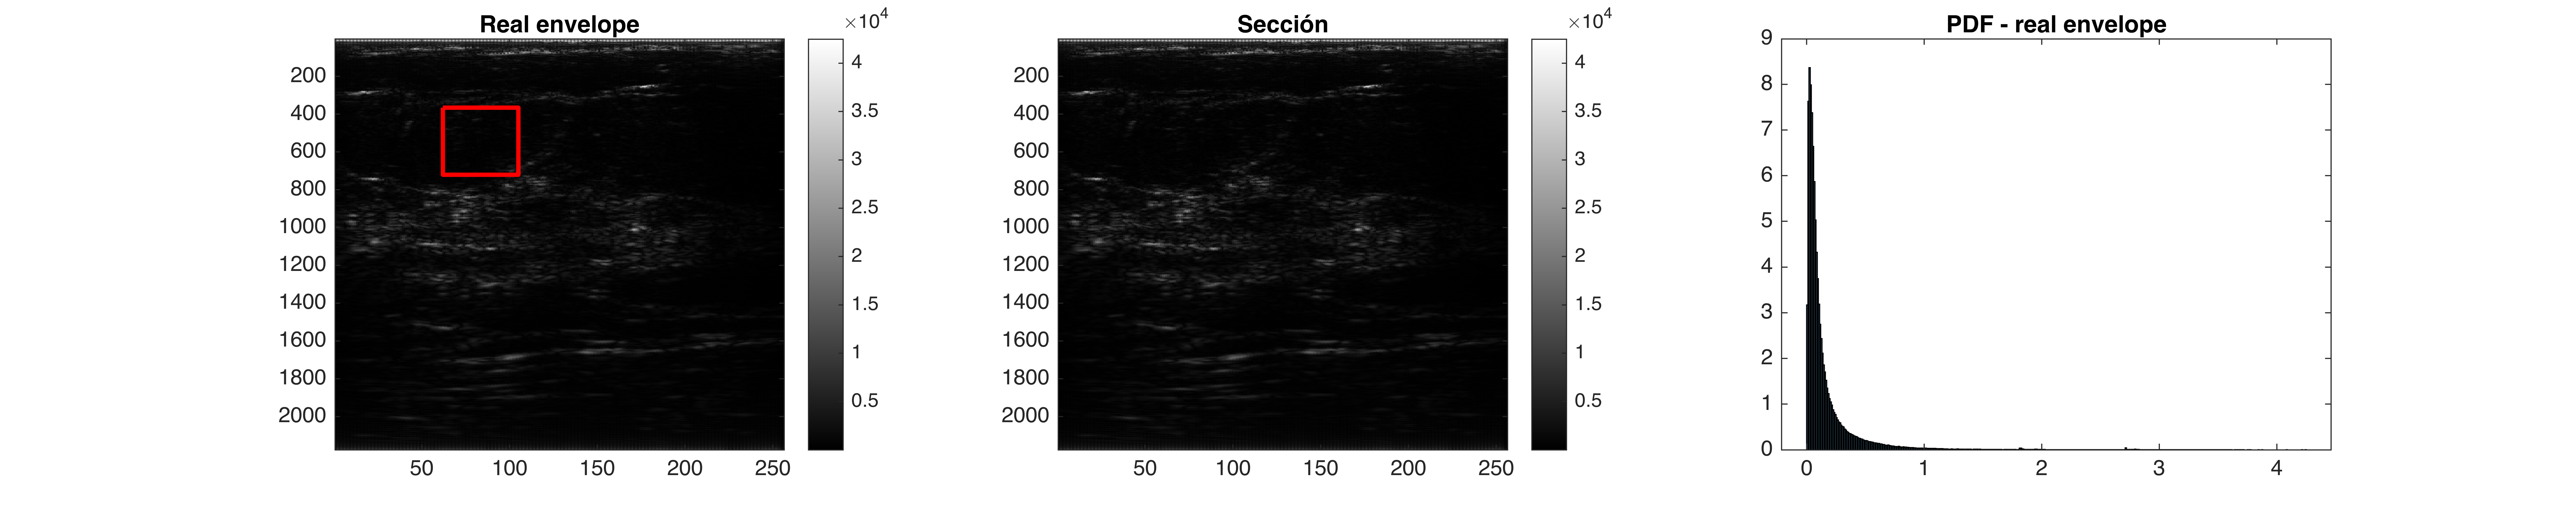

In [3]:

figure(Position=[0 0 2000 400]);
subplot(1,3,1);
imagesc(env_rf);hold on;colormap gray;colorbar;
plot([rf_xl(1), rf_xl(2), rf_xl(2), rf_xl(1), rf_xl(1)], ...
     [rf_yl(1), rf_yl(1), rf_yl(2), rf_yl(2), rf_yl(1)], ...
     LineWidth=2,Color='r');
hold off;title('\bfReal envelope');

subplot(1,3,2);imagesc(env_rf);colormap gray;colorbar;title('Sección');
subplot(1,3,3);histogram(env_rf,Normalization='pdf');title('PDF - real envelope');

In [4]:
% z=z_png;

In [5]:
%%%%%%%%% IMPLEMENTACIÓN 1 %%%%%%%%%
sigma=std(z(:));
mu=mean(z(:));
gamma=double(eulergamma);
psi=7000;

alpha=sqrt(24/pi^2*sigma^2);
% beta=mu-alpha/2*(log(2*psi)-gamma);
beta=b_0;

y=exp((z-beta)/alpha);
D_seabra1=alpha;

In [6]:
%%%%%%%%% IMPLEMENTACIÓN 2 %%%%%%%%%

% n=41; m=n; L=n*m;

n=14;
% d=zeros(100,1);
% for n=1:100
m=n; L=n*m;
% a
ni=(n-1)/2;mj=(m-1)/2;
a_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);

for i=ni+1:size(z,1)-ni
for j=mj+1:size(z,2)-mj
    window = z(i-ni:i+ni, j-mj:j+mj);
    sigma = std(window,0,'all');

    % a
    a_w(i-ni,j-mj) = sigma;
end
end
a=sqrt(24)/pi*mean(a_w,'all');
% d(n)=a;
% end

% % b
% % s_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);
% b_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);
% for i=ni+1:size(z,1)-ni
% for j=mj+1:size(z,2)-mj
%     window = z(i-ni:i+ni, j-mj:j+mj);
%     sigma = std(window,0,'all');
%
%     % s
%     % s_w(i-ni,j-mj) = min(window,[],'all');
%     s = min(window,[],'all');
%
%     % b
%     b_k=zeros(1,L);
%     for k=1:L
%         b_i_j_k= k*s/(L-1);
%         t=exp((s-b_i_j_k)/a)-1;
%         p=L/(a*sigma^2) * t*(t+1) * exp(-L/(2*sigma^2)*t^2);
%
%         b_k(k) = b_i_j_k * p;
%     end
%     b_w(i-ni,j-mj)=sum(b_k);
% end
% end
% b=mean(b_w,'all');
b=b_0;

y2=exp((z-b_0)/a);
D_seabra2=a;


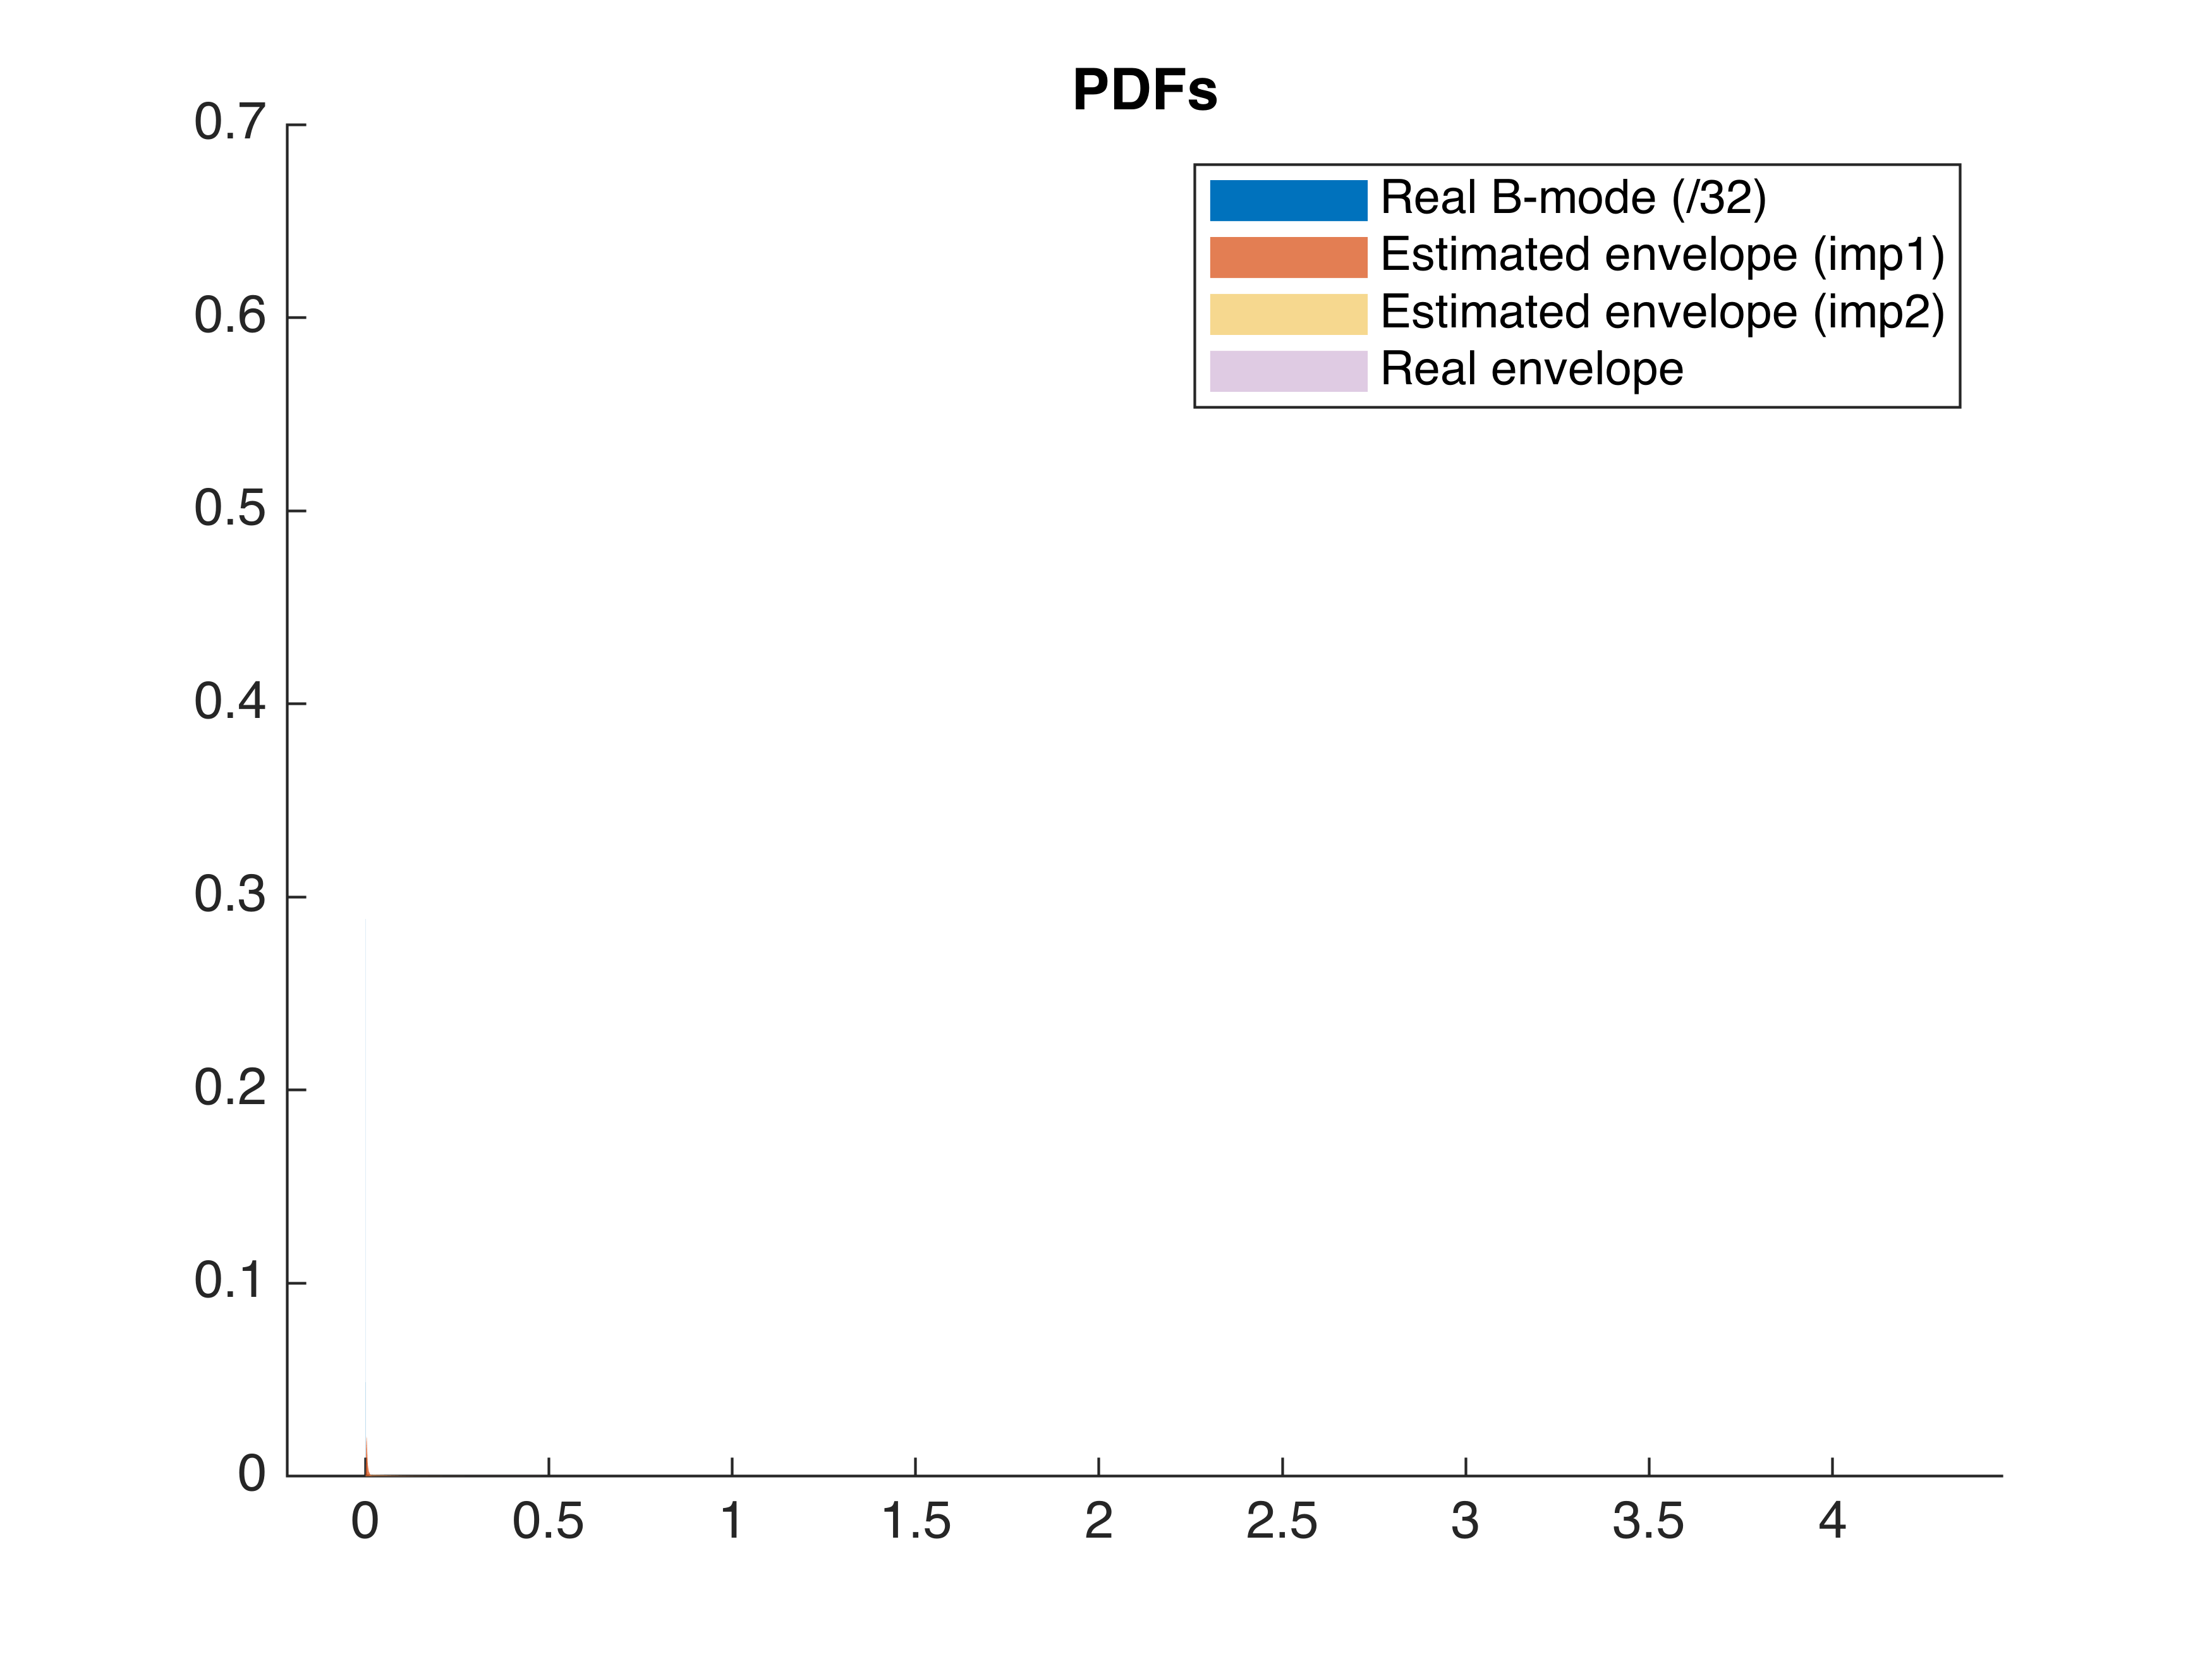

In [7]:
figure;hold on;
histogram(z/32,Normalization='pdf',FaceAlpha=1,EdgeAlpha=0);
histogram(y,Normalization='pdf',FaceAlpha=0.75,EdgeAlpha=0);
histogram(y2,Normalization='pdf',FaceAlpha=0.5,EdgeAlpha=0);
histogram(env_rf,Normalization='pdf',FaceAlpha=0.25,EdgeAlpha=0);

title('PDFs');
legend('Real B-mode (/32)','Estimated envelope (imp1)','Estimated envelope (imp2)','Real envelope'); % azul,naranja,amarillo

In [8]:
Dlabel={['True value:',num2str(a_0)];'seabra2008modeling';'seabra2011rf'};
Dvalues=[a_0;D_seabra1;D_seabra2];
disp('Valores de D');

Valores de D

In [9]:
table(Dlabel,Dvalues)

In [10]:
function v2=remaplims(v,l1,l2,L1,L2)
    v2=(v-l1)/(l2-l1)*(L2-L1)+L1;
end